In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from functools import reduce

topics = {'X0': 'news_media', 'X1': 'location', 'X2': 'numerics', 'X3': 'contractions', 'X4': 'names'
         ,'X5': 'religion', 'X6': 'derogatory_media', 'X7': 'covid_restrictions', 'X8': 'innovate'
         ,'X9': 'republicans', 'X10': 'economics', 'X11': 'family', 'X12': 'police_violence', 'X13': 'date_time'
         ,'X14': 'argument', 'X15': 'fed_investigation', 'X16': 'spam', 'X17': 'covid', 'X18': 'misc'
         ,'X19': 'law_constituion', 'X20': 'riot', 'X21': 'scotus', 'X22': 'outdoors', 'X23': 'sports'
         ,'X24': 'racism', 'X25': 'voting', 'X26': 'ideology', 'X27': 'movement', 'X28': 'social_media'
         ,'X29': 'democracy_future', 'X30': 'holiday', 'X31': 'possibility', 'X32': 'awesome', 'X33': 'prayer'
         ,'X34': 'social_media_derogatory', 'X35': 'foreign_enemies', 'X36': 'small_talk', 'X37': 'election'
         ,'X38': 'calendar_day', 'X39': 'globalism', 'X40': 'food', 'X41': 'random_objects', 'X42': 'biden_campaign'
         ,'X43': 'yeah', 'X44': 'sexual_violence', 'X45': 'no_topic'}

#read in most recent final product
df = pd.read_csv('/home/twalton_umass_edu/Political Polarization Project/final/final_product_topic_45_20210427.csv')

df = df.rename(columns = topics)

#only want republicans
df = df[df['rep_org'] == 1]

#create count dataframe average discussion of topic over time period
list_topics = []
for key, value in topics.items():
    list_topics.append(df.groupby(['school']).apply(lambda x: x[value].sum() / x['num_tweets'].sum()).reset_index(name = value))
    
counts = reduce(lambda df1,df2: pd.merge(df1,df2,on='school'), list_topics)
del list_topics

#drop random topics
counts = counts.drop(columns = ['no_topic', 'contractions', 'religion', 'date_time', 'spam', 'misc', 'outdoors', 'sports'
                               ,'movement', 'holiday', 'possibility', 'prayer', 'small_talk', 'calendar_day', 'food', 'random_objects', 'yeah'])

In [2]:
#remove from topics dictionary
topics = {key:val for key, val in topics.items() if val not in ['no_topic', 'contractions', 'religion', 'date_time', 'spam', 'misc', 'outdoors', 'sports'
                               ,'movement', 'holiday', 'possibility', 'prayer', 'small_talk', 'calendar_day', 'food', 'random_objects', 'yeah']}

In [3]:
#set index to school
x = counts.set_index('school')
#scale the averages to be between 0 and one
x = StandardScaler().fit_transform(x)

#run pca with 2 components
pca = PCA(n_components=3)
#fit the pca
principalComponents = pca.fit_transform(x)
#create the final pc dataframe
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3'])

#add the index
finalDf = pd.concat([principalDf, counts['school']], axis = 1)

In [4]:
#explained variance
pca.explained_variance_ratio_

array([0.49393726, 0.20149505, 0.16424995])

In [5]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=topics.values())

In [6]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=topics.values())

large_pc1 = loadings.nlargest(3,['PC1'])
small_pc1 = loadings.nsmallest(3,['PC1'])

large_pc2 = loadings.nlargest(3,['PC2'])
small_pc2 = loadings.nsmallest(3,['PC2'])

large_pc3 = loadings.nlargest(3,['PC3'])
small_pc3 = loadings.nsmallest(3,['PC3'])

loadings_1 = pd.concat([large_pc1, small_pc1, large_pc2, small_pc2])[['PC1', 'PC2']]

loadings_2 = pd.concat([large_pc2, small_pc2, large_pc3, small_pc3])[['PC2', 'PC3']]

loadings_3 = pd.concat([large_pc1, small_pc1, large_pc3, small_pc3])[['PC1', 'PC3']]

Text(0, 0.5, 'Principal Component 2')

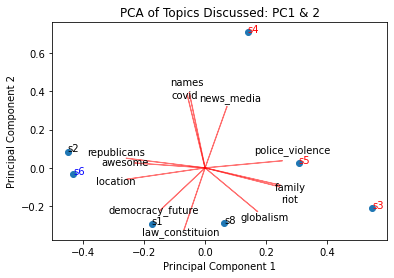

In [7]:
#pc1 * pc2
x = finalDf['pc1']
scalex = 1.0/(x.max() - x.min())

y = finalDf['pc2']
scaley = 1.0/(y.max() - y.min())

load = loadings_1

plt.scatter(x*scalex, y*scaley)
for i, txt in enumerate(finalDf['school']):
    if txt == 's3' or txt == 's5' or txt == 's4':
        plt.annotate(txt, (x[i]*scalex, y[i]*scaley), color = "red")
    elif txt == 's6':
        plt.annotate(txt, (x[i]*scalex, y[i]*scaley), color = "blue")
    else:
        plt.annotate(txt, (x[i]*scalex, y[i]*scaley))
for i in range(len(load)):
    plt.arrow(0, 0, load.iloc[i,0], load.iloc[i,1],color = 'r',alpha = 0.5)
    if load.index[i] == 'riot':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.65, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'police_violence':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*2.6, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'religion':
        plt.text(load.iloc[i,0]*.1, load.iloc[i,1]*1.1, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'law_constituion':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.05, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'democracy_future':
            plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'republicans':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.7, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'covid':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1, load.index[i], ha = 'center', va = 'center')
    else:
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.15, load.index[i], ha = 'center', va = 'center')

plt.title("PCA of Topics Discussed: PC1 & 2")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

Text(0, 0.5, 'Principal Component 3')

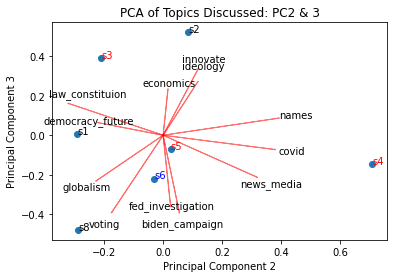

In [8]:
#pc2 * pc3
x = finalDf['pc2']
scalex = 1.0/(x.max() - x.min())

y = finalDf['pc3']
scaley = 1.0/(y.max() - y.min())

load = loadings_2

plt.scatter(x*scalex, y*scaley)
for i, txt in enumerate(finalDf['school']):
    if txt == 's3' or txt == 's5' or txt == 's4':
        plt.annotate(txt, (x[i]*scalex, y[i]*scaley), color = "red")
    elif txt == 's6':
        plt.annotate(txt, (x[i]*scalex, y[i]*scaley), color = "blue")
    else:
        plt.annotate(txt, (x[i]*scalex, y[i]*scaley))
for i in range(len(load)):
    plt.arrow(0, 0, load.iloc[i,0], load.iloc[i,1],color = 'r',alpha = 0.5)
    if load.index[i] == 'ideology':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.30, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'fed_investigation':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'religion':
        plt.text(load.iloc[i,0]*1.05, load.iloc[i,1]*1.80, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'law_constituion':
        plt.text(load.iloc[i,0]*.8, load.iloc[i,1]*1.3, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'religion':
        plt.text(load.iloc[i,0]*.5, load.iloc[i,1]*10, load.index[i], ha = 'center', va = 'center')
    else:
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.15, load.index[i], ha = 'center', va = 'center')
        
plt.title("PCA of Topics Discussed: PC2 & 3")
plt.xlabel("Principal Component 2")
plt.ylabel("Principal Component 3")

In [234]:
loadings_2

,PC2,PC3
names,0.358008,0.064378
covid,0.349985,-0.087543
news_media,0.270602,-0.228319
religion,-0.332772,-0.003334
law_constituion,-0.299979,0.166688
democracy_future,-0.224959,0.059470
innovate,0.136367,0.328863
ideology,0.103939,0.264815
economics,0.042657,0.228518
biden_campaign,0.045260,-0.392085


Text(0, 0.5, 'Principal Component 3')

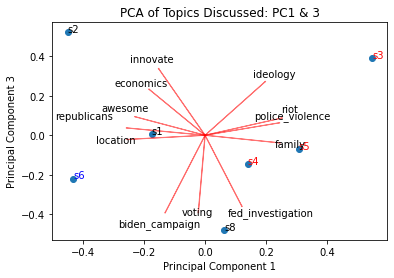

In [9]:
#pc1 * pc3
x = finalDf['pc1']
scalex = 1.0/(x.max() - x.min())

y = finalDf['pc3']
scaley = 1.0/(y.max() - y.min())

load = loadings_3

plt.scatter(x*scalex, y*scaley)
for i, txt in enumerate(finalDf['school']):
    if txt == 's3' or txt == 's5' or txt == 's4':
        plt.annotate(txt, (x[i]*scalex, y[i]*scaley), color = "red")
    elif txt == 's6':
        plt.annotate(txt, (x[i]*scalex, y[i]*scaley), color = "blue")
    else:
        plt.annotate(txt, (x[i]*scalex, y[i]*scaley))
for i in range(len(load)):
    plt.arrow(0, 0, load.iloc[i,0], load.iloc[i,1],color = 'r',alpha = 0.5)
    if load.index[i] == 'riot':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*2.1, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'republicans':
        plt.text(load.iloc[i,0]*1.55, load.iloc[i,1]*2.6, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'date_time':
        plt.text(load.iloc[i,0]*1.55, load.iloc[i,1]*1.2, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'fed_investigation':
        plt.text(load.iloc[i,0]*1.8, load.iloc[i,1]*1.10, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'voting':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1, load.index[i], ha = 'center', va = 'center')
    elif load.index[i] == 'awesome':
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.5, load.index[i], ha = 'center', va = 'center')
    else:
        plt.text(load.iloc[i,0]*1.15, load.iloc[i,1]*1.15, load.index[i], ha = 'center', va = 'center')
        
plt.title("PCA of Topics Discussed: PC1 & 3")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")

In [130]:
loadings_3

,PC1,PC3
police_violence,0.228936,0.080015
family,0.220519,-0.013989
riot,0.218225,0.084184
date_time,-0.235461,0.027267
location,-0.232912,-0.012766
republicans,-0.227547,0.027412
innovate,-0.131727,0.300879
ideology,0.181664,0.236166
economics,-0.158295,0.226489
biden_campaign,-0.116484,-0.384691
